# 가장 쉬운 scikit-learn &keras 머신러닝 이론과 실습 Part2

## 데이터 전처리 & 간단한 scikit-learn 실습


데이터 전처리는 크게 3가지로 나눌 수 있습니다. 

    1. 데이터 스케일링 
    2. 데이터 인코딩
    3. 결손값 처리 


이인호 박사님 실습때 진행했던 데이터 스케일링과 데이터 인코딩에 더해 결손값 처리를 실습해 보도록 하겠습니다.



## 데이터 스케일링 iris 데이터 이용 실습
1. 정규화
- 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는것을 의미
대표적인 예시 : StandardScaler

2. 표준화
- 서로 다른 feature의 크기를 통일하기 위해 변환해주는 개념
대표적인 예시 : MinMaxScaler




In [5]:
from google.colab import drive 
drive.mount('/content/Drive/')


ModuleNotFoundError: No module named 'google.colab'

In [1]:
# 실습에 필요한 library들을 import 해주도록 하겠습니다.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
from sklearn.preprocessing import StandardScaler
data = [[1,1], [2,3], [3,2], [1,1]]
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)
print(scaled)
# for inverse transformation
inversed = scaler.inverse_transform(scaled)
print(inversed)

[[-0.90453403 -0.90453403]
 [ 0.30151134  1.50755672]
 [ 1.50755672  0.30151134]
 [-0.90453403 -0.90453403]]
[[1. 1.]
 [2. 3.]
 [3. 2.]
 [1. 1.]]


In [8]:
print(np.array(data).mean())
print(np.array(data).std())

1.75
0.82915619758885


In [9]:
from sklearn.datasets import load_iris
# import pandas as pd
# sklearn library에 내제되어있는 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환 

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.tail()
# iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [10]:
# iris

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled_std = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled_std = pd.DataFrame(data=iris_scaled_std, columns=iris.feature_names)

In [26]:
iris_df_scaled_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [27]:
iris_df_scaled_std.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [30]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled_mm = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled_mm = pd.DataFrame(data=iris_scaled_mm, columns=iris.feature_names)
iris_df_scaled_mm.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [31]:
iris_df_scaled_mm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## 데이터 인코딩

머신러닝시 사이킷런 탬플렛을 사용한다면 문자형(string)데이터를 다룰 수 없다. 

이 때문에 머신러닝에 적용시킬 수 있는 데이터형으로 인코딩을 해줘야 한다. 

예를 들어 머신러닝 특징(Feature)중에 남여의 성별을 나타내는 경우가 있다면 'Male' 혹은 'Female'로 나타낼 수 있다. 

하지만 이를 머신러닝 모델에 적용하기 위해서는 int 혹은 float값등 머신러닝 알고리즘을 적용시킬 수 있는 특징(feature)로 변형 시켜줄 필요가 있다.

여러가지 방법이 있지만 one-hot-encoding과 Label Encoding에 대해 알아보도록 하자.

쉽게 설명하면

1.레이블 인코딩
- a,b,c -> 0,1,2
2.원 핫 인코딩
- a,b,c  -> [1,0,0],[0,1,0],[0,0,1]

In [32]:
from sklearn.preprocessing import LabelEncoder

letters=['a','b','c','d','f']

label_encoder = LabelEncoder()
label_encoder.fit(letters)
labels = label_encoder.transform(letters)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 2 3 4]


In [33]:
# 인코더에 사용된 값들을 확인해 볼 수 있다.
label_encoder.classes_
# 순서대로 0,1,2,3,4

array(['a', 'b', 'c', 'd', 'f'], dtype='<U1')

In [36]:

# 역으로 인코딩된 숫자를 디코딩 해볼 수 도 있다.
label_encoder.inverse_transform([4, 4, 2, 1, 3, 3])

array(['f', 'f', 'c', 'b', 'd', 'd'], dtype='<U1')

In [37]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

letters=np.array(['a','b','c','d','e','f'])


letters = letters.reshape(-1,1)


oh_encoder = OneHotEncoder()
oh_encoder.fit(letters)
oh_labels = oh_encoder.transform(letters)

print(oh_labels.toarray())
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
(6, 6)


### 타이타닉 데이터셋 이용 레이블 인코딩 실습

1. scikit-learn labelEncoder 이용법
2. categorical로 바꾼 후 cat.codes 이용법

In [38]:
df = pd.read_csv('/content/Drive/MyDrive/2021 여름 머신러닝 스터디/가장 쉬운 scikitlearn&keras Part2/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Sex'])
labels = label_encoder.transform(df['Sex'])


In [ ]:
labels

In [42]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [43]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Sex'])
labels = label_encoder.transform(df['Sex'])

df['Sex']=labels

In [ ]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df['Sex'] = df['Sex'].astype('category')
df['Sex'] = df['Sex'].cat.codes

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### 타이타닉 데이터셋 이용 원-핫-인코딩 실습



In [50]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.iloc[:,]

In [53]:
df['female'] = pd.get_dummies(df['Sex']).iloc[:,0]
df['male'] = pd.get_dummies(df['Sex']).iloc[:,1]

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [55]:
df= df.drop('Sex',axis=1)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  female       891 non-null    uint8  
 12  male         891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(2)
memory usage: 78.4+ KB


In [ ]:
print(df["Ticket"].unique())
print(df["Ticket"].nunique())

In [64]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Ticket'])
labels = label_encoder.transform(df['Ticket'])

df['Ticket']=labels

# df['Sex'] = df['Sex'].astype('category')
# df['Sex'] = df['Sex'].cat.codes

In [65]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,523,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,596,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,669,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,49,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,472,8.0500,NaN,S,0,1


### 3. 결손값 처리

결손값 처리 방법의 예시
1. 숫자형일 경우 평균값으로 처리
2. Object일 경우 최빈값으로 처리
3. 결손값이 너무 많은 경우 Drop


In [66]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [72]:
df['Age'] = df['Age'].fillna(29.699118)

# 평균값으로 처리

In [73]:
df['Age'].mean()

29.699117717171788

In [74]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 평균값으로 처리

In [75]:
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [77]:
df['Embarked'].mode()[0]

'S'

In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [79]:
df = df.drop(['Cabin'],axis =1)

In [80]:
df.drop(['Age'],axis =1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## plot make regression 이용 간단한 scikit-learn template 실습


(100, 1)
(100,)
(100, 1)
(100, 1)


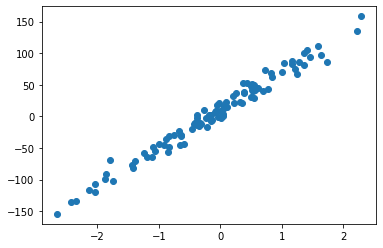

In [83]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)
print(X.shape)
print(y.shape)
y = np.expand_dims(y, axis=1)
print(X.shape)
print(y.shape)
plt.scatter(X, y)
plt.show()


In [87]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 10)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[  16.64   14.49]
 [  59.43   61.59]
 [  29.14   23.38]
 [  22.7    21.3 ]
 [  53.15   73.76]
 [  41.83   48.98]
 [  22.     32.18]
 [  -3.82   -1.82]
 [   4.66    6.67]
 [-145.93 -154.41]
 [ 106.22   97.66]
 [  89.76   81.54]
 [   8.91   20.72]
 [  32.34   39.2 ]
 [ -91.89 -102.88]
 [-127.41 -133.91]
 [  92.52  105.65]
 [  50.79   40.86]
 [   7.71   -1.32]
 [  71.06   84.7 ]
 [  83.23   66.86]
 [  25.07   36.84]
 [ -63.    -57.61]
 [  10.03    9.31]
 [ -28.28  -44.91]
 [ 102.95  111.1 ]
 [  -9.66  -10.09]
 [ -73.32  -82.38]
 [   6.73   17.8 ]
 [ -47.96  -44.41]]


In [88]:
from sklearn.metrics import mean_squared_error
## root mean square error 확인
np.sqrt(mean_squared_error(y_test,y_pred))


9.538992371576073

In [89]:
print(regressor.score(X_test,y_test))

print(regressor.score(X_train,y_train))


0.979456261884012
0.9760467204388455


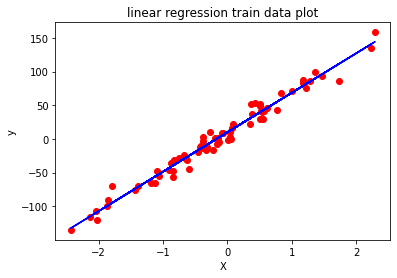

In [90]:
plt.scatter(X_train, y_train, c = 'red')
plt.plot(X_train, regressor.predict(X_train), c = 'blue')
plt.title('linear regression train data plot')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


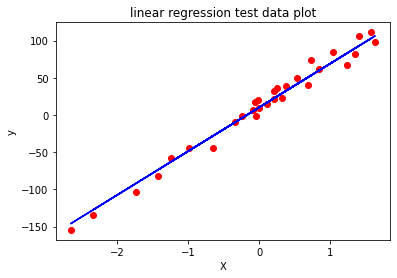

In [91]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('linear regression test data plot')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [92]:
print(regressor.coef_)
print(regressor.intercept_)

[[58.64]]
[10.03]


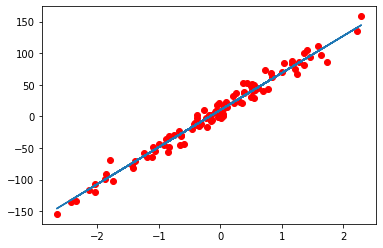

In [93]:
plt.scatter(X, y,c = 'red')
plt.plot(X,regressor.coef_*X+regressor.intercept_)
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LinearRegression())])

pipeline.fit(X_train,y_train)

y_preds = pipeline.predict(X_test)
# root mean square error 확인
np.sqrt(mean_squared_error(y_test,y_preds))

10.390383850028766

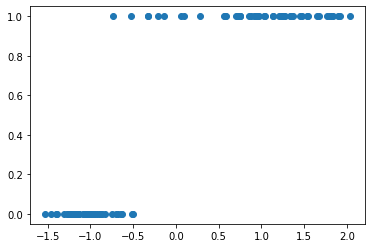

In [94]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=1, n_informative = 1,n_redundant=0,n_clusters_per_class=1, random_state=2)

plt.scatter(X,y)

In [100]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 10)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# # Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



[[ 0.88  1.  ]
 [ 0.46  1.  ]
 [ 0.01  0.  ]
 [ 0.1   0.  ]
 [ 0.13  0.  ]
 [ 0.85  1.  ]
 [ 0.16  0.  ]
 [ 0.05  0.  ]
 [ 0.18  0.  ]
 [ 0.1   0.  ]
 [-0.08  0.  ]
 [ 1.    1.  ]
 [ 1.11  1.  ]
 [ 0.13  0.  ]
 [ 0.24  0.  ]
 [ 0.55  1.  ]
 [ 0.17  0.  ]
 [ 0.53  1.  ]
 [ 0.07  0.  ]
 [ 0.84  1.  ]
 [-0.03  0.  ]
 [ 0.03  0.  ]
 [ 0.98  1.  ]
 [ 0.86  1.  ]
 [ 0.13  0.  ]
 [ 0.88  1.  ]
 [ 0.13  0.  ]
 [ 0.04  0.  ]
 [ 0.05  0.  ]
 [ 0.06  0.  ]]


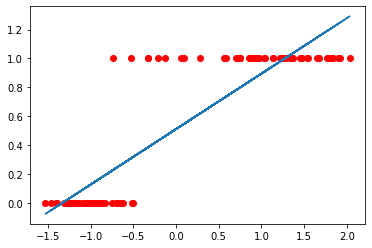

In [101]:
plt.scatter(X, y,c = 'red')
plt.plot(X,regressor.coef_*X+regressor.intercept_)
plt.show()


In [103]:
regressor.score(X_test,y_test)
regressor.score(X_train,y_train)

0.7654190810356537

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test=train_test_split(X, y, \
                                                  test_size=0.20, random_state=2021)
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test, LR_pred)



1.0

In [99]:
print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))

0.95
1.0


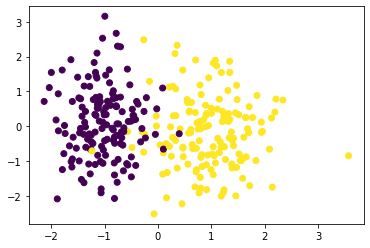

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=300, n_features=2, n_informative = 1,n_redundant=0,n_clusters_per_class=1, random_state=2)

plt.scatter(X[:,0],X[:,1],c =y )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test=train_test_split(X, y, \
                                                  test_size=0.20, random_state=2021)
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test, LR_pred)



0.9666666666666667